## 1. Gain a Comprehensive Understanding of the Problem Statement and Evaluate the Business Case

**Predicting Customer Churn in the Telecom Industry**

• Customer attrition analysis plays a crucial role as a key business metric for telecom service providers, as retaining existing customers is more cost-effective than acquiring new ones.

• Utilizing machine learning algorithms, companies can analyze customer attrition rates by considering various factors such as subscribed services, tenure, gender, senior citizen status, payment method, and more.

• This practical project focuses on training multiple classification algorithms, including Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Random Forest Classifier, to accurately predict the churn rate of telecom customers.

## 2. Import Libraries and Datasets, Conduct Exploratory Data Analysis (EDA)

In [ ]:
%pip install cufflinks    # A third-party wrapper library around Plotly. It will works as a connector between the Pandas library and Plotly.

In [1]:
import pandas as pd                 # Data Manipulation
import numpy as np                  # Multi-dimensional array object

import matplotlib.pyplot as plt     # Data Visualization
import plotly.express as px         # Interactive Data Visualization
import plotly.graph_objects as go
import seaborn as sns               # Data Visualization

In [2]:
telecom_df = pd.read_csv('telecom_churn.csv')
telecom_df.head()

state  account_length  area_code  phone_number  international_plan   
0     16             128        415          2845                   0  \
1     35             107        415          2301                   0   
2     31             137        415          1616                   0   
3     35              84        408          2510                   1   
4     36              75        415           155                   1   

   voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls   
0                1                     25              265.1              110  \
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge   
0             45.07  ...               99             16.78  \
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge   
0                244.7                 91               11.01  \
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge   
0                10.0                 3               2.70  \
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  class  
0                              1      0  
1                              1      0  
2                              0      0  
3                              2      0  
4                              3      0  

[5 rows x 21 columns]

In [3]:
telecom_df.shape

(5000, 21)

In [4]:
telecom_df.columns   # Display the feature columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [6]:
# Find the maximum and avg. daily minutes (~180 and ~352 minutes, see below)

telecom_df.describe()

state  account_length    area_code  phone_number   
count  5000.00000      5000.00000  5000.000000   5000.000000  \
mean     25.99840       100.25860   436.911400   2499.500000   
std      14.80348        39.69456    42.209182   1443.520003   
min       0.00000         1.00000   408.000000      0.000000   
25%      13.00000        73.00000   408.000000   1249.750000   
50%      26.00000       100.00000   415.000000   2499.500000   
75%      39.00000       127.00000   415.000000   3749.250000   
max      50.00000       243.00000   510.000000   4999.000000   

       international_plan  voice_mail_plan  number_vmail_messages   
count         5000.000000      5000.000000            5000.000000  \
mean             0.094600         0.264600               7.755200   
std              0.292691         0.441164              13.546393   
min              0.000000         0.000000               0.000000   
25%              0.000000         0.000000               0.000000   
50%              0.000000         0.000000               0.000000   
75%              0.000000         1.000000              17.000000   
max              1.000000         1.000000              52.000000   

       total_day_minutes  total_day_calls  total_day_charge  ...   
count        5000.000000      5000.000000       5000.000000  ...  \
mean          180.288900       100.029400         30.649668  ...   
std            53.894699        19.831197          9.162069  ...   
min             0.000000         0.000000          0.000000  ...   
25%           143.700000        87.000000         24.430000  ...   
50%           180.100000       100.000000         30.620000  ...   
75%           216.200000       113.000000         36.750000  ...   
max           351.500000       165.000000         59.760000  ...   

       total_eve_calls  total_eve_charge  total_night_minutes   
count      5000.000000       5000.000000          5000.000000  \
mean        100.191000         17.054322           200.391620   
std          19.826496          4.296843            50.527789   
min           0.000000          0.000000             0.000000   
25%          87.000000         14.140000           166.900000   
50%         100.000000         17.090000           200.400000   
75%         114.000000         19.900000           234.700000   
max         170.000000         30.910000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes   
count        5000.000000         5000.000000         5000.000000  \
mean           99.919200            9.017732           10.261780   
std            19.958686            2.273763            2.761396   
min             0.000000            0.000000            0.000000   
25%            87.000000            7.510000            8.500000   
50%           100.000000            9.020000           10.300000   
75%           113.000000           10.560000           12.000000   
max           175.000000           17.770000           20.000000   

       total_intl_calls  total_intl_charge  number_customer_service_calls   
count       5000.000000        5000.000000                    5000.000000  \
mean           4.435200           2.771196                       1.570400   
std            2.456788           0.745514                       1.306363   
min            0.000000           0.000000                       0.000000   
25%            3.000000           2.300000                       1.000000   
50%            4.000000           2.780000                       1.000000   
75%            6.000000           3.240000                       2.000000   
max           20.000000           5.400000                       9.000000   

             class  
count  5000.000000  
mean      0.141400  
std       0.348469  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 21 columns]

## 3. Conduct Data Visualization to Enhance Data Analysis

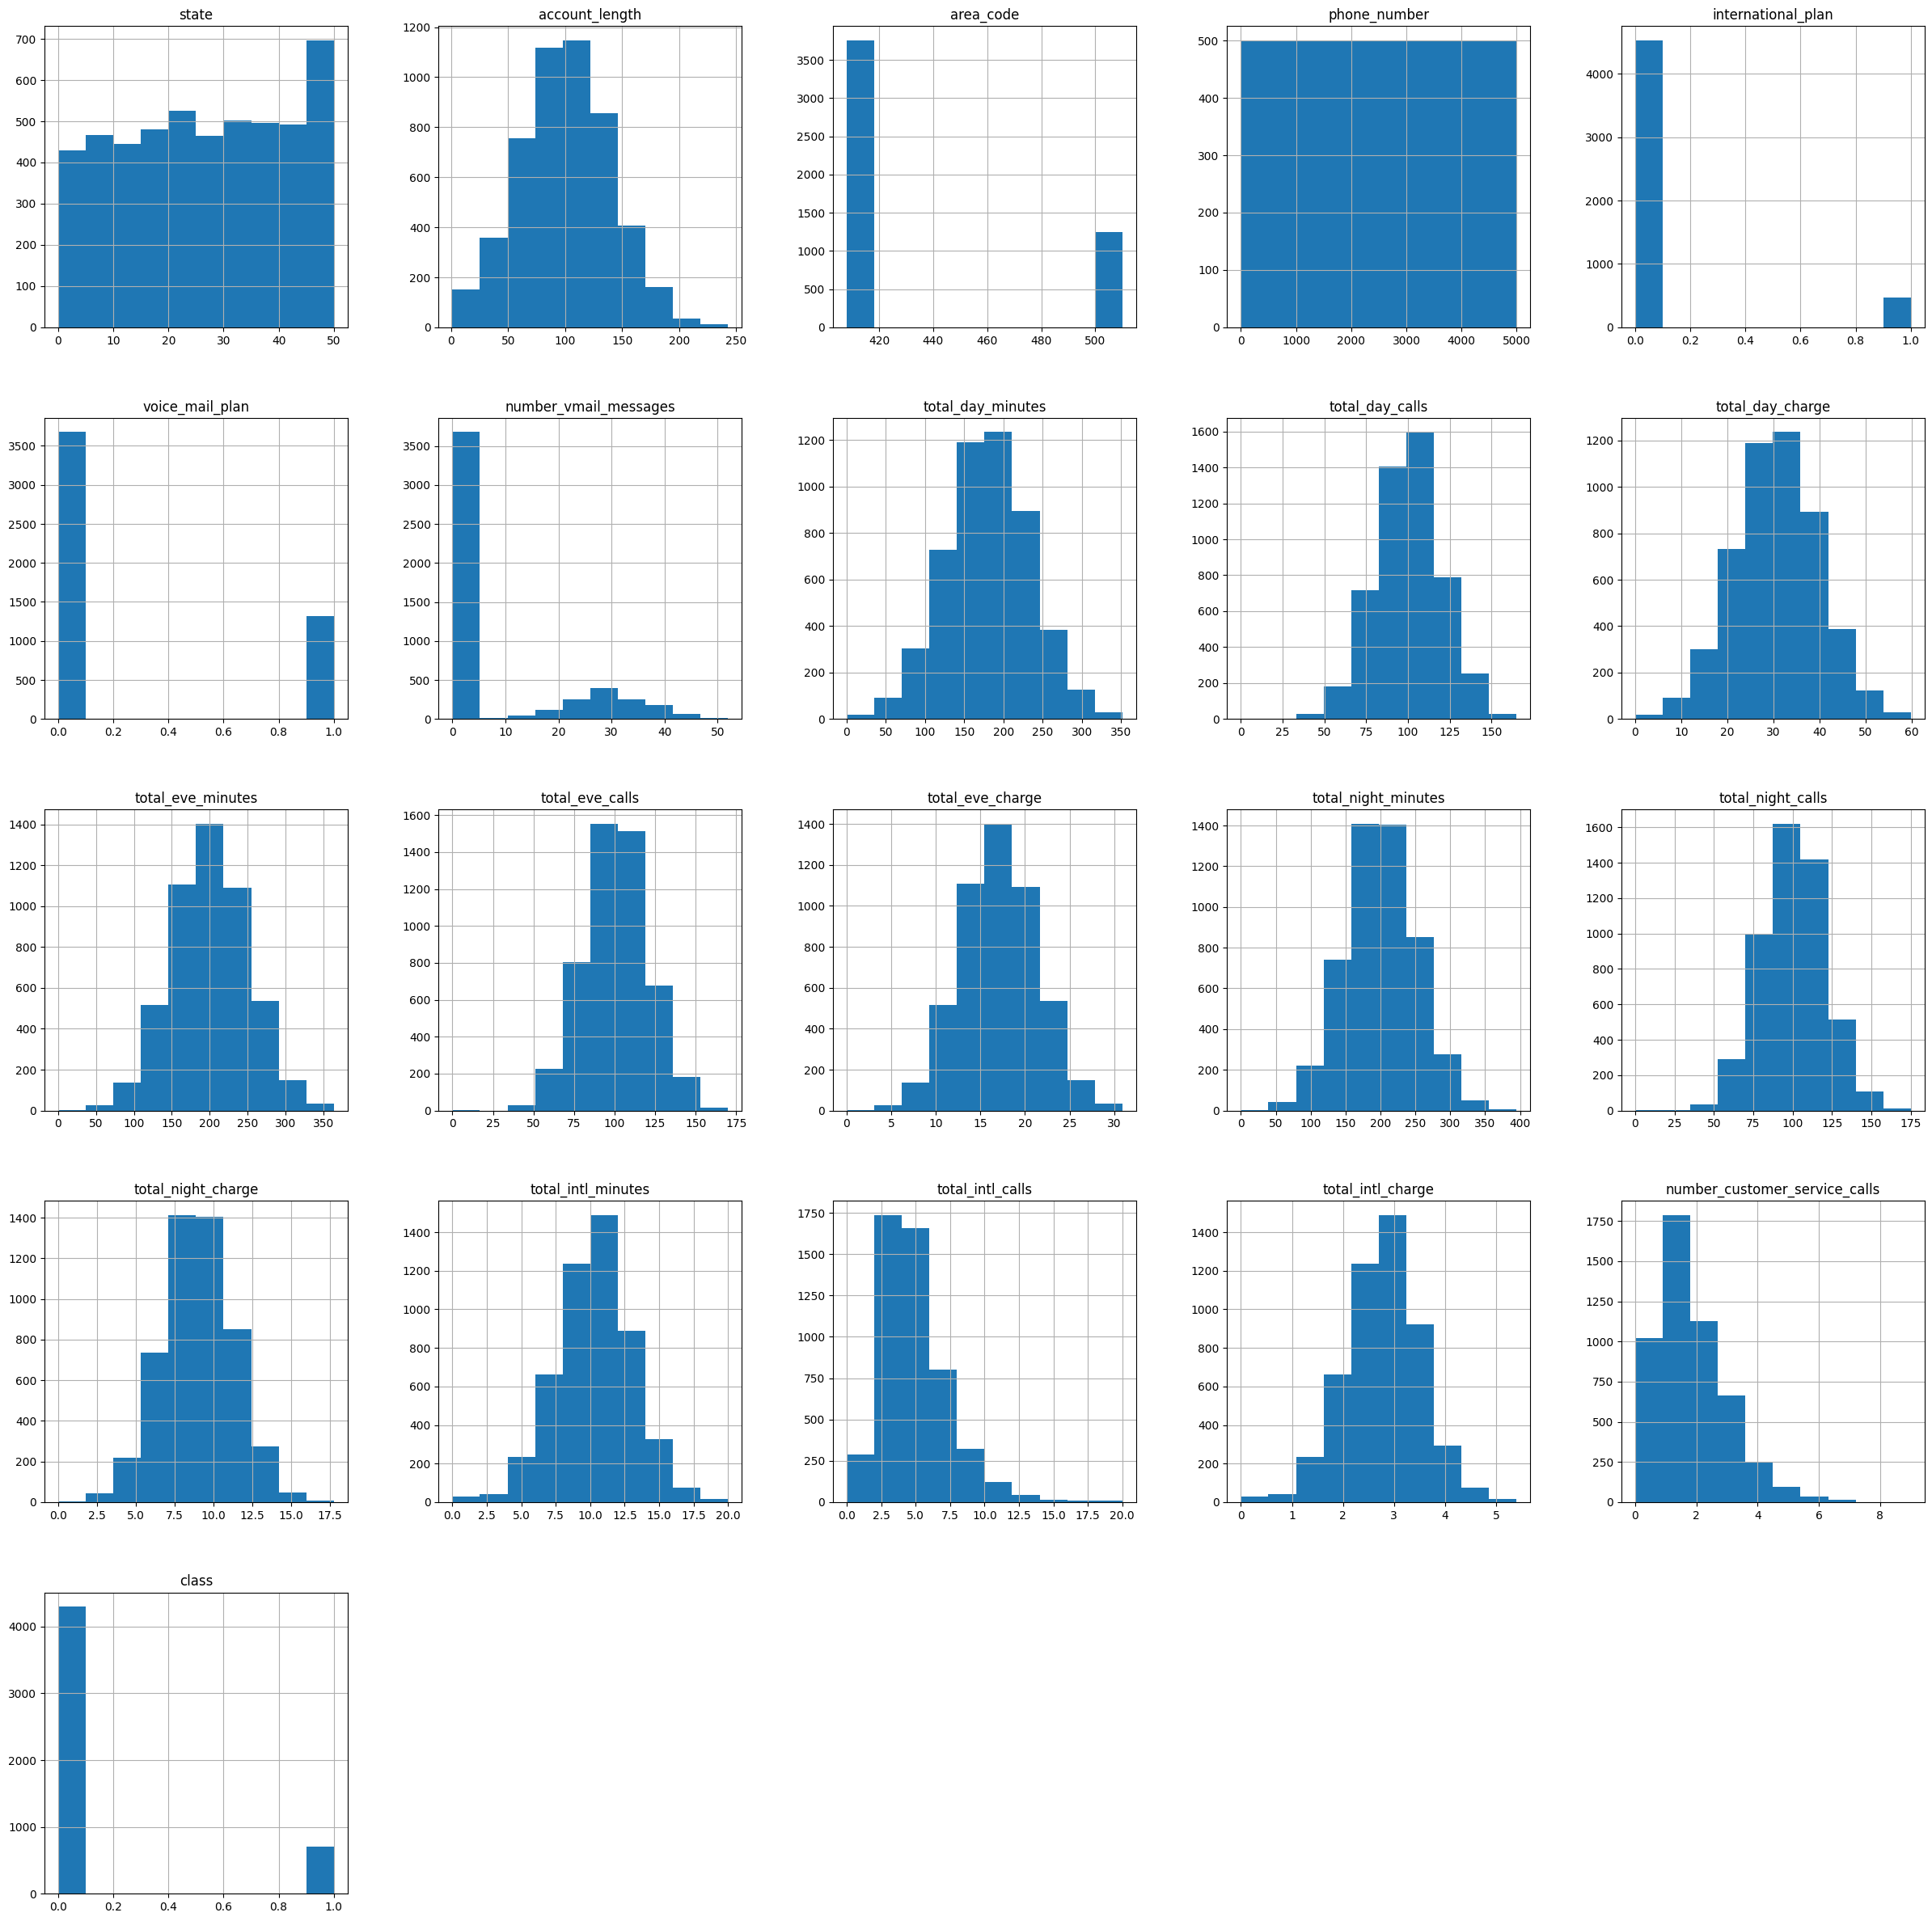

In [7]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [8]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

telecom_df['class'].value_counts()

# Retained (0) -> 4293
# Left the company (1) -> 707

class
0    4293
1     707
Name: count, dtype: int64

In [9]:
fig = go.Figure(data = [go.Pie(labels = ['Retained (0)', 'Exited (1)'], values = telecom_df['class'].value_counts())])
fig.show()

In [16]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained

fig = px.histogram(telecom_df, x = 'international_plan', color = 'class')
fig.update_layout(
title="Histogram of Telecom Customers by International Plan",
autosize=False,
width=500,
height=700
)
fig.show()

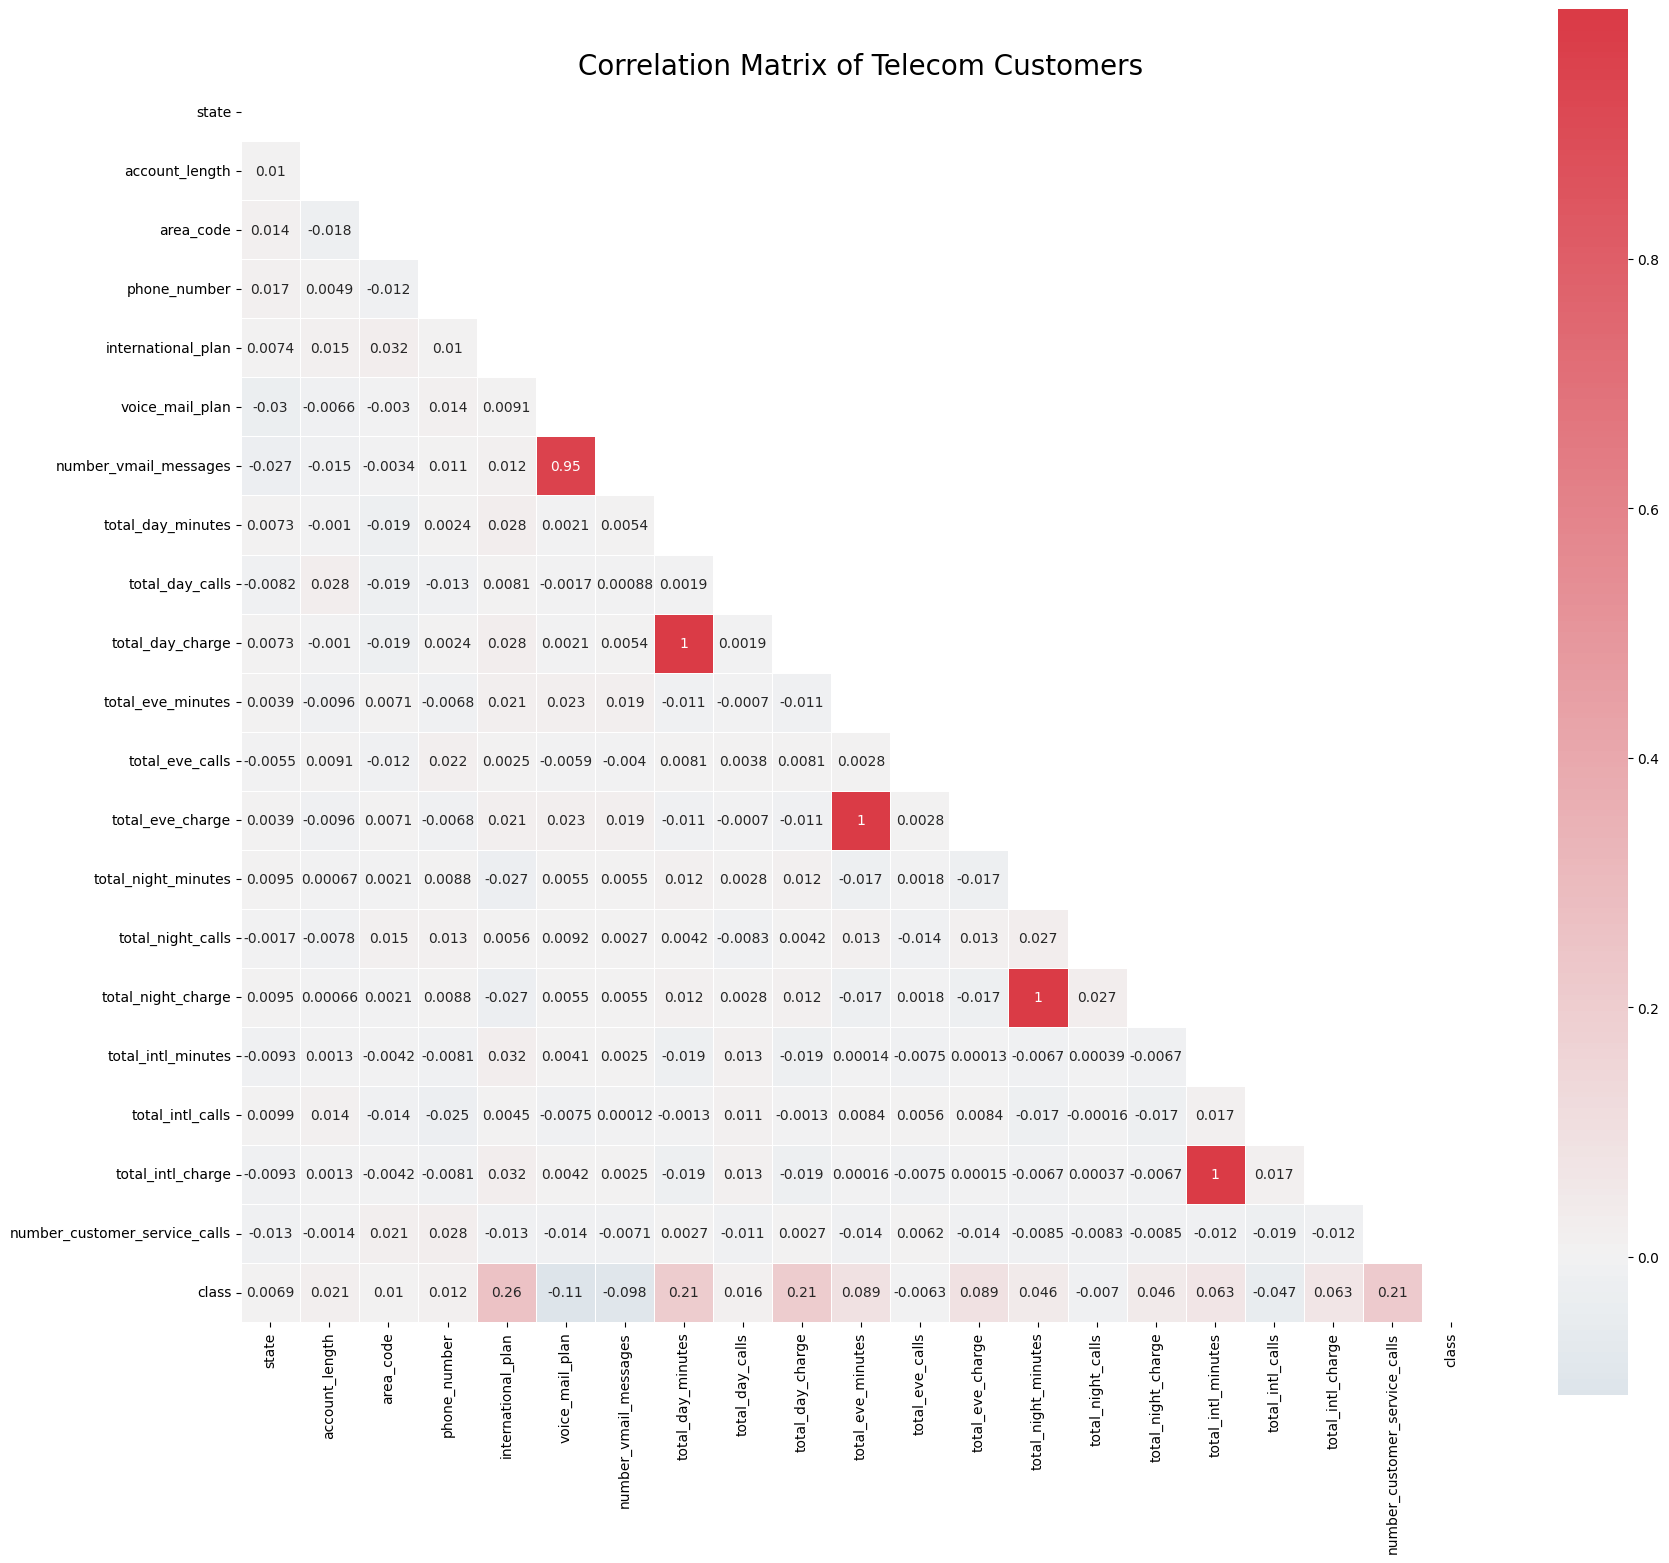

In [17]:
corr = telecom_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.title("Correlation Matrix of Telecom Customers", fontsize=20)
plt.show()

**Observations:**

A strong correlation is observed between "voice_mail_plan" and "number_vmail_messages."

A high correlation is evident between "total_day_charge" and "total_daily_minutes."

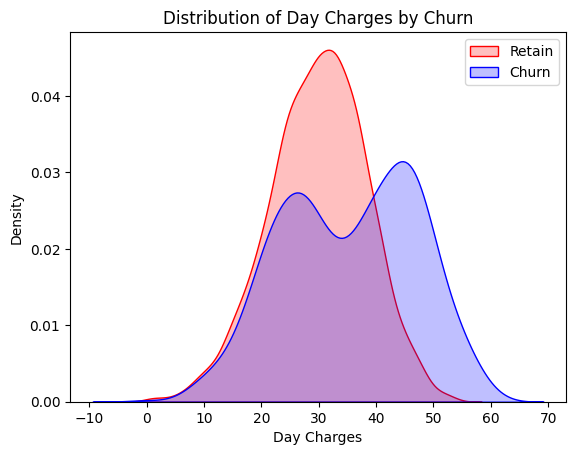

<Figure size 1000x600 with 0 Axes>

In [20]:
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
color="Red", fill=True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
color="Blue", fill=True)

ax.legend(["Retain", "Churn"], loc="upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of Day Charges by Churn")

plt.figure(figsize=(10, 6))
plt.show()

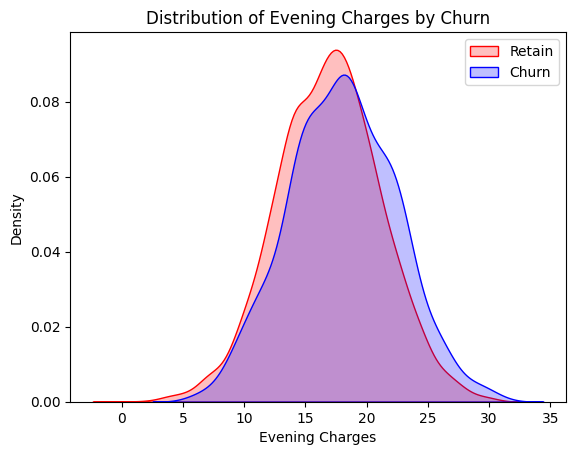

<Figure size 1000x600 with 0 Axes>

In [21]:
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
color="Red", fill=True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
color="Blue", fill=True)

ax.legend(["Retain", "Churn"], loc="upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of Evening Charges by Churn")

plt.figure(figsize=(10, 6))
plt.show()

In [22]:
# Histogram on voice mail plan correlated with Churn feature

fig = px.histogram(telecom_df, x = 'voice_mail_plan', color = 'class')
fig.update_layout(
title="Histogram of Telecom Customers by International Plan",
autosize=False,
width=500,
height=700
)
fig.show()

##  4. Determine Feature Importance and Perform Data Preparation Prior to Model Training

To optimize training speed, enhance model interpretability, and improve generalization performance on test data, it is essential to identify and select the most relevant features in the dataset. This process plays a crucial role in maximizing the efficiency and effectiveness of the model. 

In [23]:
# Assign input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [24]:
X.shape

(5000, 18)

In [25]:
y.shape

(5000,)

In [26]:
# Perform train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
# Verify that the train/test split was successful

X_train.shape

(4000, 18)

In [28]:
X_test.shape

(1000, 18)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

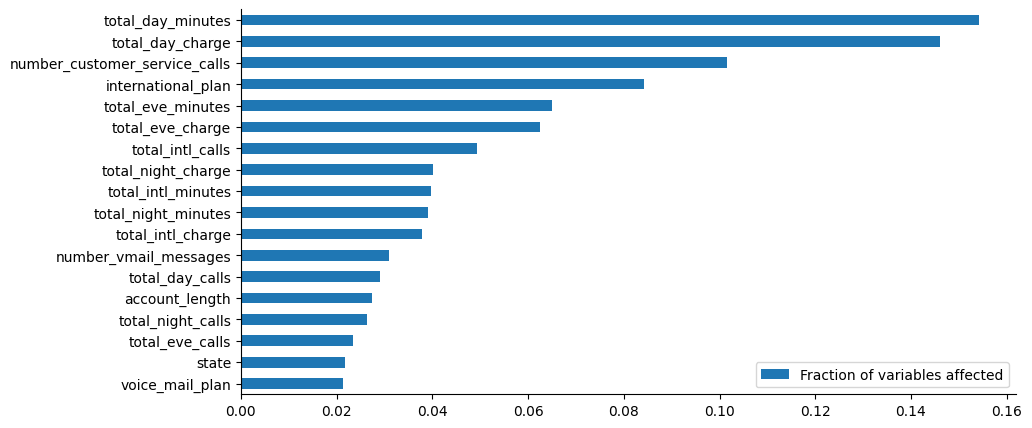

In [30]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

**Findings:** The presented graph has been generated using the Random Forest algorithm, revealing the ranking of feature importance. According to the graph, "total_day_minutes" emerges as the most significant feature, followed by "total_day_minutes," and so forth. These findings contribute to a comprehensive understanding of the relative importance of each feature within the analyzed dataset.

## 5. Perform Training and Evaluation of a Logistic Regression Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/home/tahame2/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

**Observation:** The above analysis indicates that the model failed to converge (status=1). However, despite this issue, it is still valuable to examine the performance of the model on the test dataset.

In [32]:
y_predict = model_LR.predict(X_test)

In [33]:
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       854
           1       0.78      0.10      0.17       146

    accuracy                           0.86      1000
   macro avg       0.82      0.55      0.55      1000
weighted avg       0.85      0.86      0.82      1000



**Findings:** We have two class: "class 0" and "class 1". The model predicted that 854 things belong to class 0, and it was right for all of them. But for class 1, it only predicted 146 things correctly out of 1460. That's not so good.

The model's accuracy tells us how often it was right overall. In this case, it was right about 86% of the time.

There are a few more numbers like precision, recall, and f1-score. They help us understand how well the model did for each class. For class 0, the model was very good at predicting it. But for class 1, it wasn't so good. The f1-score takes into account both precision and recall to give us an overall idea of how well the model did for both classes.

<Axes: >

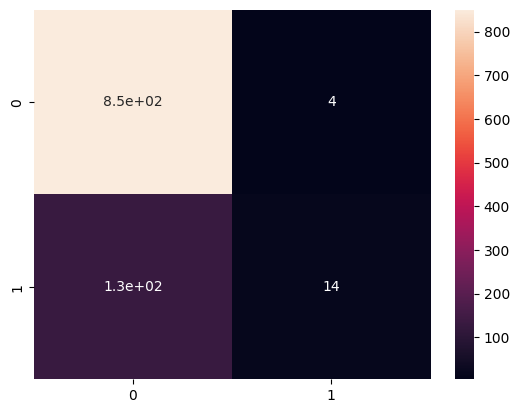

In [34]:
# Confusion matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

Let's interpret these results and comment on the model's performance:

**True positives (TP) for class 0:** The model has a relatively high number of true positives for class 0 (correctly predicted 850 instances of class 0), indicating that it is effective at correctly identifying instances of class 0.

**True negatives (TN) for class 1:** The number of true negatives for class 1 is quite low, suggesting that the model struggles to correctly identify instances of class 1.

**False positives (FP) for class 0:** The number of false positives for class 0 is small, indicating that the model made few incorrect predictions by classifying instances as class 0 when they actually belonged to class 1.

**False negatives (FN) for class 1:** On the other hand, the number of false negatives for class 1 is relatively high, suggesting that the model frequently misclassified instances of class 1 as class 0.

## 6. Perform Training and Evaluation of a Support Vector Machine Classifier

In [39]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train, y_train)

/home/tahame2/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/tahame2/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/tahame2/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/tahame2/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/tahame2/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(estimator=LinearSVC(max_iter=10000))

In [40]:
y_predict = model_svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       854
           1       0.51      0.14      0.22       146

    accuracy                           0.85      1000
   macro avg       0.69      0.56      0.57      1000
weighted avg       0.82      0.85      0.82      1000



<Axes: >

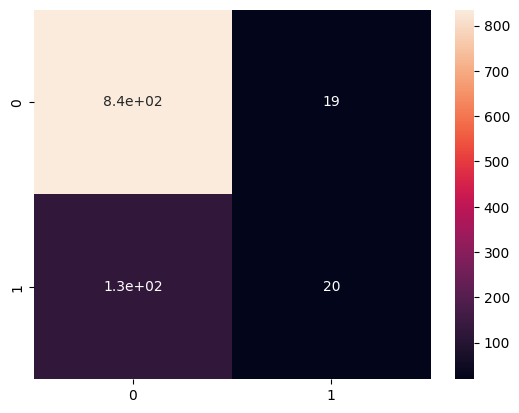

In [41]:
# Confusion matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

## 7. Perform Training and Evaluation of a Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       854
           1       1.00      0.70      0.82       146

    accuracy                           0.96      1000
   macro avg       0.98      0.85      0.90      1000
weighted avg       0.96      0.96      0.95      1000



<Axes: >

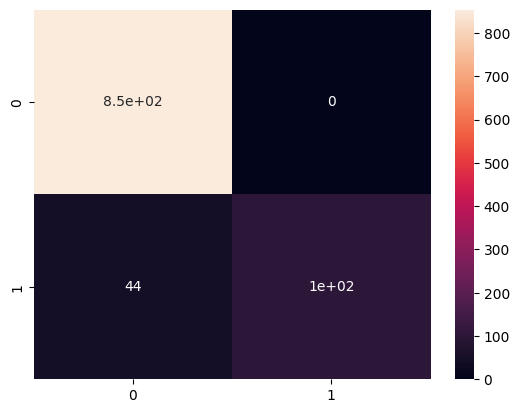

In [44]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**Findings:** The overall accuracy of the model is 0.96, indicating that it correctly predicts the class labels for 96% of the instances in the test dataset.

In terms of the macro average, which considers both classes, the precision, recall, and f1-score are 0.98, 0.85, and 0.90, respectively. This indicates a high level of performance, with class 1 having a lower recall compared to class 0, leading to a slightly lower macro average.

The weighted average, taking into account the class imbalance, reports a precision of 0.96, recall of 0.96, and f1-score of 0.95. This suggests that the model performs well across both classes, considering their respective proportions in the dataset.

## 8. Perform Training and Evaluation of a KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_predict = model_knn.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       854
           1       0.79      0.23      0.35       146

    accuracy                           0.88      1000
   macro avg       0.83      0.61      0.64      1000
weighted avg       0.87      0.88      0.85      1000



<Axes: >

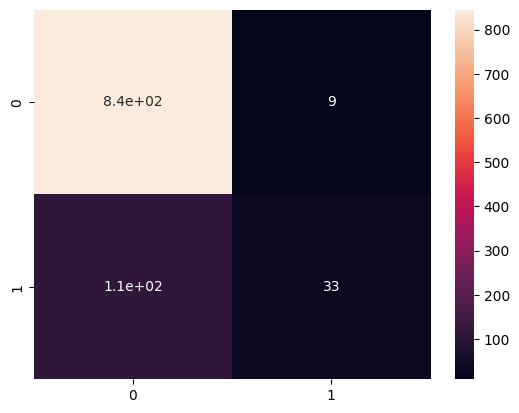

In [47]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**Findings:** Its performs better compared to logistic regression and SVM. However, it still falls short in outperforming random forest classifier.

## 9. Perform Training and Evaluation of a Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
y_predict = model_gnb.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       854
           1       0.55      0.50      0.53       146

    accuracy                           0.87      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.86      0.87      0.87      1000



<Axes: >

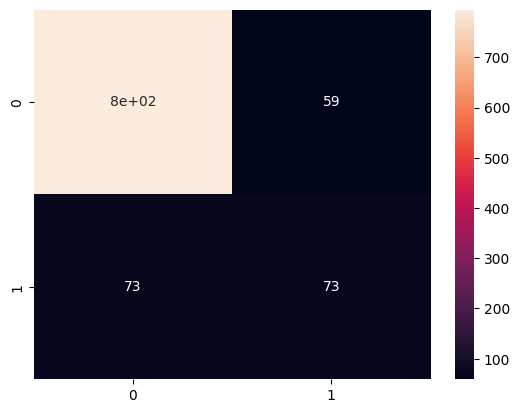

In [51]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

## 10. Visualize ROC Curves and Calculate AUC Scores for the 5 Classification Models

In [52]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)

In [53]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.728273074331911
Support Vector Machine:  0.8096307465272207
Random Forest:  0.8926606461133746
K-Nearest Neighbors:  0.6581558179076705
Naive Bayes:  0.815742196272176


**Findings:** These scores reflect the performance of each model in terms of its ability to distinguish between the positive and negative classes. A higher AUC score indicates better classification performance, with Random Forest and Naive Bayes showing relatively higher scores compared to the other models.

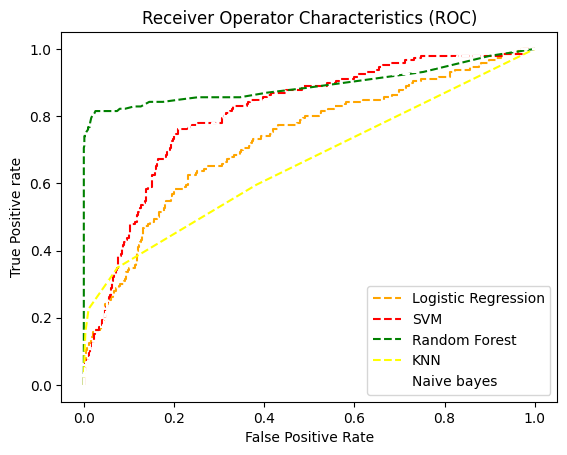

In [55]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 450)
plt.show()

**Conclusion:**

Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~95% label accuracy
2. Precision: ~95% labeled as Retained customers and ~100% labeled as churned customers
3. Recall: ~100% labeled as Retained customers and ~70% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/